In [4]:
!python setup_notebook_and_training_env.py

Home dir: /home/jen.che
Scratch dir: /scratch/jen.che
KaggleHub cache: /scratch/jen.che/nutrition5k_cache
Virtual env: /home/jen.che/nutrition5k_env

Created/verified shared cache directory.

Installing basic Notebook libraries (user mode)...
Notebook environment ready.

Training virtual environment already exists.
Installing training libraries inside venv...
Training environment setup complete.

Checking for Nutrition5K dataset...
Dataset already found at: /scratch/jen.che/nutrition5k_cache/datasets/siddhantrout/nutrition5k-dataset

Files in dataset folder: ['dish_ingredients.xlsx', 'dishes.xlsx', 'ingredients.xlsx']
Preview of dish_ingredients.xlsx:
           dish_id          ingr_id   ingr_name  ...       fat      carb   protein
0  dish_1561662216  ingr_0000000508   soy sauce  ...  0.020391  0.166530  0.275284
1  dish_1561662216  ingr_0000000122      garlic  ...  0.010621  0.700955  0.135943
2  dish_1561662216  ingr_0000000026  white rice  ...  0.025489  2.378998  0.229403
3  dish_

In [5]:
import pandas as pd
import os

base = "/scratch/jen.che/nutrition5k_cache/datasets/siddhantrout/nutrition5k-dataset"

# 讀取三個主要檔案
dish_ingr = pd.read_excel(os.path.join(base, "dish_ingredients.xlsx"))
dishes = pd.read_excel(os.path.join(base, "dishes.xlsx"))
ingredients = pd.read_excel(os.path.join(base, "ingredients.xlsx"))

print("Dataset loaded successfully")
print("dish_ingredients:", dish_ingr.shape)
print("dishes:", dishes.shape)
print("ingredients:", ingredients.shape)


display(dish_ingr.head())
display(dishes.head())
display(ingredients.head())


Dataset loaded successfully
dish_ingredients: (28455, 8)
dishes: (5006, 6)
ingredients: (555, 6)


,dish_id,ingr_id,ingr_name,grams,calories,fat,carb,protein
0,dish_1561662216,ingr_0000000508,soy sauce,3.398568,1.801241,0.020391,0.166530,0.275284
1,dish_1561662216,ingr_0000000122,garlic,2.124105,3.164916,0.010621,0.700955,0.135943
2,dish_1561662216,ingr_0000000026,white rice,8.496420,11.045346,0.025489,2.378998,0.229403
3,dish_1561662216,ingr_0000000524,parsley,0.213397,0.079170,0.001707,0.013657,0.006189
4,dish_1561662216,ingr_0000000094,onions,1.707173,0.682869,0.001707,0.153646,0.018779


,dish_id,total_mass,total_calories,total_fat,total_carb,total_protein
0,dish_1561662216,300.794281,193,12.387489,28.218290,18.633970
1,dish_1562688426,137.569992,88,8.256000,5.190000,10.297000
2,dish_1561662054,419.438782,292,23.838249,26.351543,25.910593
3,dish_1562008979,382.936646,290,22.224644,10.173570,35.345387
4,dish_1560455030,20.590000,103,0.148000,4.625000,0.956000


,ingr,id,cal/g,fat(g),carb(g),protein(g)
0,cottage cheese,1,0.980,0.043,0.034,0.110
1,strawberries,2,0.330,0.003,0.080,0.007
2,garden salad,3,0.646,0.034,0.032,0.061
3,bacon,4,5.410,0.420,0.014,0.370
4,potatoes,5,0.770,0.001,0.170,0.020



--- dish_ingredients columns ---
['dish_id', 'ingr_id', 'ingr_name', 'grams', 'calories', 'fat', 'carb', 'protein']

--- dishes columns ---
['dish_id', 'total_mass', 'total_calories', 'total_fat', 'total_carb', 'total_protein']

--- ingredients columns ---
['ingr', 'id', 'cal/g', 'fat(g)', 'carb(g)', 'protein(g)']

共有 5006 道菜在兩張表中同時存在


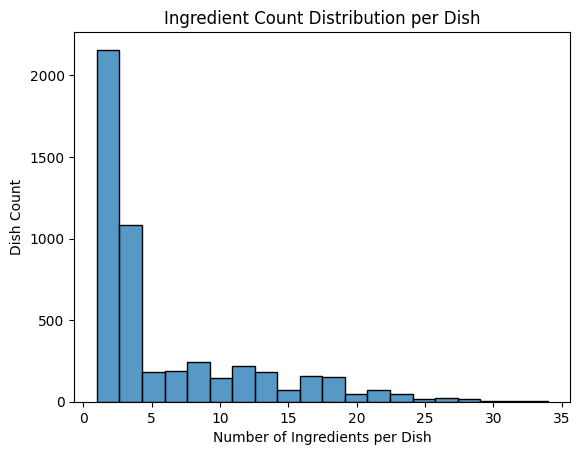

In [6]:
# === 檢查欄位與關聯 ===
print("\n--- dish_ingredients columns ---")
print(dish_ingr.columns.tolist())

print("\n--- dishes columns ---")
print(dishes.columns.tolist())

print("\n--- ingredients columns ---")
print(ingredients.columns.tolist())

# === 檢查主鍵一致性 ===
common_dish = set(dish_ingr["dish_id"]).intersection(set(dishes["dish_id"]))
print(f"\n共有 {len(common_dish)} 道菜在兩張表中同時存在")

# === 每道菜含有的 ingredient 數量分布 ===
import seaborn as sns
import matplotlib.pyplot as plt

dish_counts = dish_ingr["dish_id"].value_counts()
sns.histplot(dish_counts, bins=20)
plt.xlabel("Number of Ingredients per Dish")
plt.ylabel("Dish Count")
plt.title("Ingredient Count Distribution per Dish")
plt.show()


食材統計

/tmp/ipykernel_1391675/3777101471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_ingr.index, x=top_ingr.values, orient="h", palette="crest")


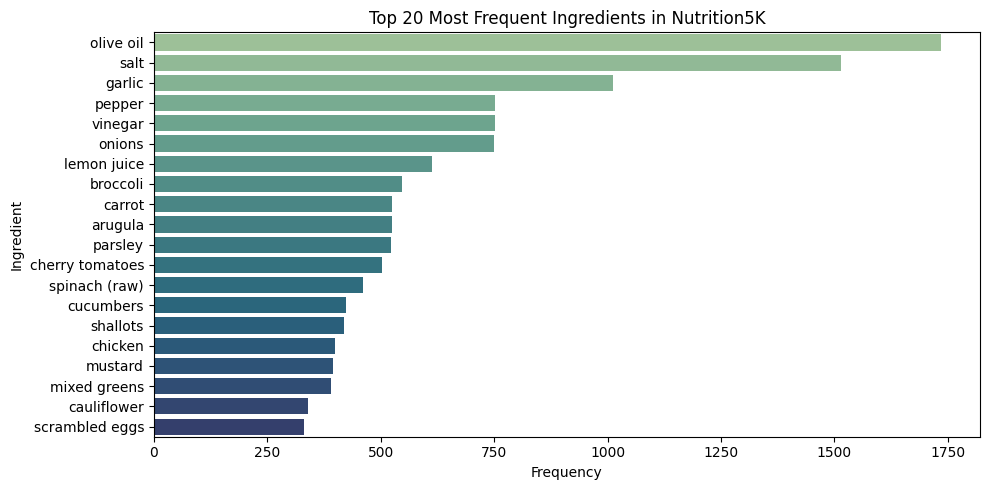

In [7]:
top_ingr = dish_ingr["ingr_name"].value_counts().head(20)

plt.figure(figsize=(10,5))
sns.barplot(y=top_ingr.index, x=top_ingr.values, orient="h", palette="crest")
plt.title("Top 20 Most Frequent Ingredients in Nutrition5K")
plt.xlabel("Frequency")
plt.ylabel("Ingredient")
plt.tight_layout()
plt.show()


每道菜的營養成分分布

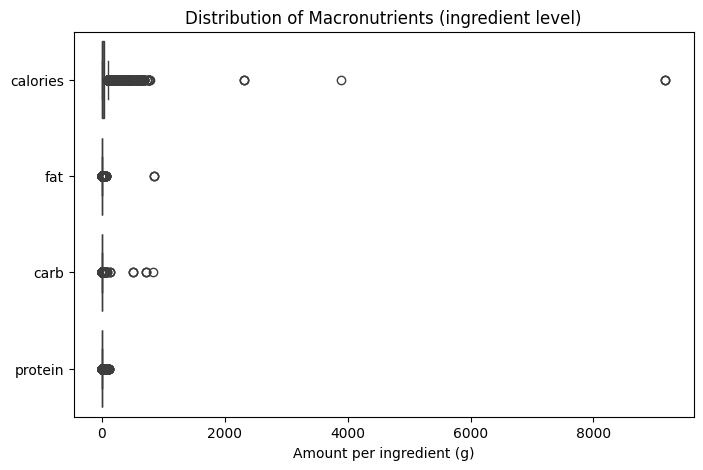

In [8]:
macro_cols = ["calories", "fat", "carb", "protein"]

plt.figure(figsize=(8,5))
sns.boxplot(data=dish_ingr[macro_cols], orient="h")
plt.title("Distribution of Macronutrients (ingredient level)")
plt.xlabel("Amount per ingredient (g)")
plt.show()


建立資料摘要報表

In [10]:
summary = {
    "total_dishes": len(dishes),
    "unique_ingredients": dish_ingr['ingr_name'].nunique(),
    "avg_ingredients_per_dish": dish_ingr['dish_id'].value_counts().mean(),
    "most_common_ingredient": dish_ingr['ingr_name'].mode()[0],
    "max_calories_dish": dishes.loc[dishes['total_calories'].idxmax(), 'dish_id'],
    "max_calories_value": dishes['total_calories'].max(),
}

for k, v in summary.items():
    print(f"{k:30}: {v}")


total_dishes                  : 5006
unique_ingredients            : 249
avg_ingredients_per_dish      : 5.684178985217739
most_common_ingredient        : olive oil
max_calories_dish             : dish_1551232973
max_calories_value            : 7975


Saved week6_calories_distribution.png & week6_summary.json


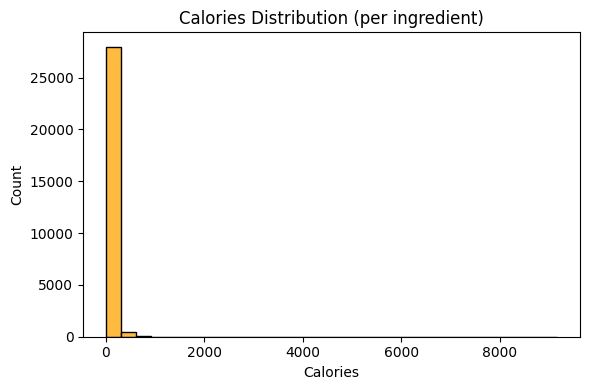

In [12]:
# 儲存圖表與統計摘要
plt.figure(figsize=(6,4))
sns.histplot(dish_ingr["calories"], bins=30, color="orange")
plt.title("Calories Distribution (per ingredient)")
plt.xlabel("Calories")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("week6_calories_distribution.png")

# 儲存資料摘要
import json
with open("week6_summary.json", "w") as f:
    json.dump(summary, f, indent=2)

print("Saved week6_calories_distribution.png & week6_summary.json")
